#Problem 3: Stochastic Gradient Descent (30 points)
In class we covered the baseline stochastic gradient descent. Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyper-parameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

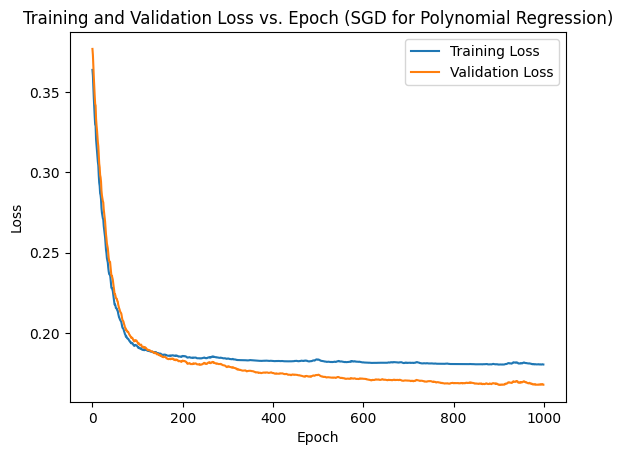

Final parameters: [ 0.24182772 -0.87642965  1.84266208 -2.09975269]


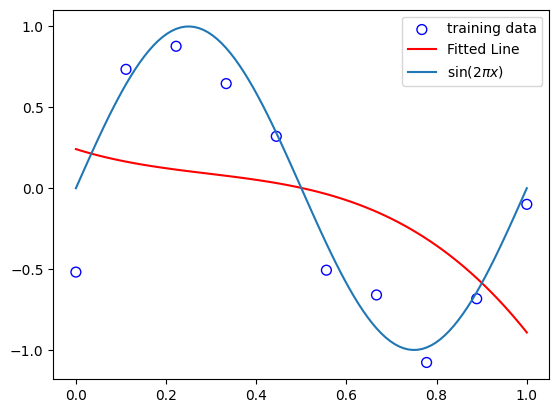

Final Training Loss: 0.1803345444521764
Final Validation Loss: 0.16774171688213013


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(1234)
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size) #values will be generated between 0 and 1 inclusively
    np.random.shuffle(x) #Shuffles the values of x to randomize the data
    y = func(x) + np.random.normal(scale=std, size=x.shape) #adds normally distributed noise with standard deviation
    return x, y

# sinusoidal function returns the sine of 2 * pi * x.
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

#Generates training data using the sinusoidal function with 10 samples and noise with standard deviation 0.25.
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100) #Generates 100 evenly spaced test input features between 0 and 1.
y_test = sinusoidal(x_test) #Computes the target values for the test input features using the sinusoidal function.

# Function to add polynomial features up to a given degree
def add_polynomial_features(x, degree):
    X_poly = np.vander(x, degree + 1, increasing=True)
    return X_poly

degree = 3  # Degree of the polynomial features

# Add polynomial features to the input data
X_train = add_polynomial_features(x_train, degree)
X_test = add_polynomial_features(x_test, degree)

# Initialize parameters (weights)
theta = np.random.randn(degree + 1)  # Initializes the weight vector theta with random values

# Hyperparameters
learning_rate = 0.001
epochs = 1000
batch_size = 1  # For SGD, batch size is 1

# Hypothesis function
def hypothesis(X, theta):
    return X.dot(theta)  # Computes the dot product between the input features X and the weight vector theta to make predictions

# Loss function (Mean Squared Error)
def compute_loss(X, y, theta):
    m = len(y)  # Computes the number of training examples
    predictions = hypothesis(X, theta)  # Computes predictions using the hypothesis function
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)  # Computes the MSE loss
    return loss

# Gradient computation
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    gradient = (1/m) * X.T.dot(predictions - y)  # Computes the gradient of the loss function with respect to the weights
    return gradient

# SGD algorithm
train_loss_history = []
val_loss_history = []
m_train = len(y_train)

for epoch in range(epochs):
    for i in range(m_train):
        random_index = np.random.randint(m_train)  # Selects a random index from the training dataset
        X_i = X_train[random_index:random_index+1]  # Selects the input feature for the randomly chosen training example
        y_i = y_train[random_index:random_index+1]  # Selects the target value for the randomly chosen training example
        gradient = compute_gradient(X_i, y_i, theta)  # Computes the gradient for the randomly chosen training example
        theta -= learning_rate * gradient  # Updates the weights using the computed gradient and learning rate
    train_loss = compute_loss(X_train, y_train, theta)  # Computes the training loss
    val_loss = compute_loss(X_test, y_test, theta)  # Computes the validation loss
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

# Plot training and validation loss vs. epoch
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epoch (SGD for Polynomial Regression)')
plt.legend()
plt.show()

# Print final parameters
print("Final parameters:", theta)  # Prints the final learned parameters (weights)

# Plot the data and the fitted line
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")  # Plots the training data points as blue circles
y_pred = hypothesis(X_test, theta)  # Computes predictions for the test input features using the final learned parameters
plt.plot(x_test, y_pred, label='Fitted Line', color='red')  # Plots the fitted regression line as a red line
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")  # Plots the sinusoidal target function as a blue line
plt.legend()
plt.show()

# Compute final training and validation losses
final_train_loss = compute_loss(X_train, y_train, theta)
final_val_loss = compute_loss(X_test, y_test, theta)

# Print final losses
print("Final Training Loss:", final_train_loss)
print("Final Validation Loss:", final_val_loss)

#Note:
the sinusoidal function is used for visualization purposes only. It plots the original sinusoidal function, along with the fitted polynomial curve to compare how well the polynomial regression model approximates the sinusoidal function.

While the model itself is trained using polynomial features and SGD for polynomial regression, it's helpful to visualize the original sinusoidal function alongside the fitted polynomial curve to understand how well the model captures the underlying pattern in the data. This comparison allows for an intuitive assessment of the model's performance in approximating the original function.

#SGD with validation set
Stochastic Gradient Descent (SGD) with Validation Set for Linear Regression
it uses stochastic gradient descent for training a linear regression model and includes a validation set for monitoring model performance during training.

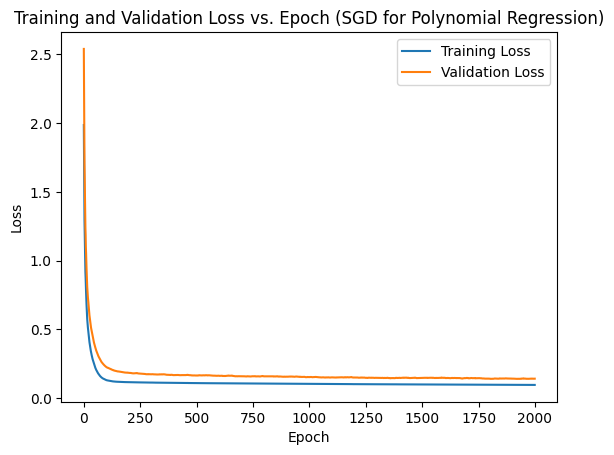

Final parameters: [ 0.87718563 -1.35291406 -0.87747087 -1.58392561  1.76078649  0.74242553]
Final Loss on Training Data: 0.09644533618152092
Final Loss on Testing Data: 0.1418505636242852


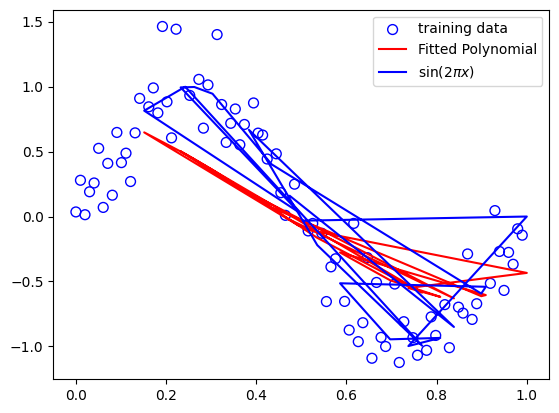

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(1234)
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

# Sinusoidal function
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

# Create data
x, y = create_toy_data(sinusoidal, 100, 0.25)  # Increase sample size for better train-test split

# Train-test split
split_ratio = 0.8
split_index = int(split_ratio * len(x))
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Function to add polynomial features up to a given degree
def add_polynomial_features(x, degree):
    X_poly = np.vander(x, degree + 1, increasing=True)
    return X_poly

degree = 5  # Degree of the polynomial features

# Add polynomial features to the input data
X_train = add_polynomial_features(x_train, degree)
X_test = add_polynomial_features(x_test, degree)

# Initialize parameters (weights)
theta = np.random.randn(degree + 1)  # Initializes the weight vector theta with random values

# Hyperparameters
learning_rate = 0.001
epochs = 2000
batch_size = 1

# Hypothesis function
def hypothesis(X, theta):
    return X.dot(theta)  # Computes the dot product between the input features X and the weight vector theta to make predictions

# Loss function (Mean Squared Error)
def compute_loss(X, y, theta):
    m = len(y)  # Computes the number of training examples
    predictions = hypothesis(X, theta)  # Computes predictions using the hypothesis function
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)  # Computes the MSE loss
    return loss

# Gradient computation
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    gradient = (1/m) * X.T.dot(predictions - y)  # Computes the gradient of the loss function with respect to the weights
    return gradient

# SGD algorithm
train_loss_history = []
val_loss_history = []
m_train = len(y_train)

for epoch in range(epochs):
    for i in range(m_train):
        random_index = np.random.randint(m_train)  # Selects a random index from the training dataset
        X_i = X_train[random_index:random_index+1]  # Selects the input feature for the randomly chosen training example
        y_i = y_train[random_index:random_index+1]  # Selects the target value for the randomly chosen training example
        gradient = compute_gradient(X_i, y_i, theta)  # Computes the gradient for the randomly chosen training example
        theta -= learning_rate * gradient  # Updates the weights using the computed gradient and learning rate
    train_loss = compute_loss(X_train, y_train, theta)  # Computes the training loss
    val_loss = compute_loss(X_test, y_test, theta)  # Computes the validation loss
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)

# Calculate Loss
train_final_loss = compute_loss(X_train, y_train, theta)
test_final_loss = compute_loss(X_test, y_test, theta)

# Plot training and validation loss vs. epoch
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epoch (SGD for Polynomial Regression)')
plt.legend()
plt.show()

# Print final parameters and Loss values
print("Final parameters:", theta)
print("Final Loss on Training Data:", train_final_loss)
print("Final Loss on Testing Data:", test_final_loss)

# Plot the data and the fitted polynomial curve
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
y_pred = hypothesis(X_test, theta)
plt.plot(x_test, y_pred, label='Fitted Polynomial', color='red')
plt.plot(x_test, sinusoidal(x_test), label="$\sin(2\pi x)$", color='blue')
plt.legend()
plt.show()


#Summary from the output

The two plots illustrate the performance and convergence of the Stochastic Gradient Descent (SGD) algorithm for polynomial regression up to degree 5. The first plot, showing training and validation loss versus epochs, indicates a successful learning process where both losses decrease steadily over time, suggesting the model is fitting the data well. The final training loss is approximately 0.0964, and the validation loss is around 0.1419, indicating a reasonable fit with minor overfitting.

The second plot visualizes the fitted polynomial curve against the training data and the original sinusoidal function. The fitted polynomial curve not too closely follows the true sinusoidal pattern, but it could  capture some the underlying trend despite the noise in the training data.
Although polynomial regression can capture non-linear patterns, it might not perfectly mimic a smooth sinusoidal curve, because our synthetic data is noisy.( includes normally distributed noise with a standard deviation of 0.25.)

The final model parameters reflect the coefficients of the polynomial terms, demonstrating the model's ability to generalize the sinusoidal relationship within the given data range.

#Problem 4: SGD Enhancements (30 points)
In this exercise you will implement some enhancements to the implementation of Problem 3 (the linear regression problem) that can improve the convergence speed of the algorithm. Implement from scratch the following enhancements and compare the convergence speed of each algorithm to the baseline SGD algorithm

Momentum (15 points)
Adam (15 points)
Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

#Comparison of Optimization Algorithm Convergence: SGD vs. Momentum vs. Adam---Train Loss

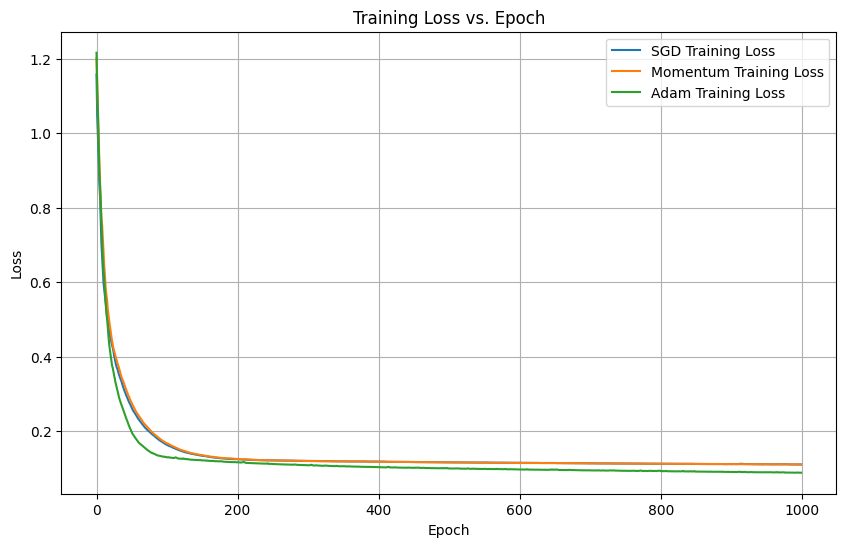

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for polynomial regression
np.random.seed(1234)
def create_toy_data_poly(sample_size, std, domain=[0, 1], degree=5):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=std, size=x.shape)
    X = np.vander(x, degree + 1, increasing=True)  # Generate polynomial features
    return X, y

# Hyperparameters
epochs = 1000
learning_rate = 0.001
beta1 = 0.9  # for Momentum
beta2 = 0.999  # for Adam
epsilon = 1e-8  # for Adam

# Loss function (Mean Squared Error)
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return loss

# Gradient computation
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

# SGD algorithm
def sgd(X_train, y_train, theta, learning_rate, epochs):
    train_loss_history = []
    m_train = len(y_train)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            theta -= learning_rate * gradient
        train_loss = compute_loss(X_train, y_train, theta)
        train_loss_history.append(train_loss)

    return train_loss_history, theta

# Momentum optimizer
def momentum_optimizer(X_train, y_train, theta, learning_rate, epochs, beta1):
    train_loss_history = []
    m_train = len(y_train)
    momentum = np.zeros_like(theta)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            momentum = beta1 * momentum + (1 - beta1) * gradient
            theta -= learning_rate * momentum
        train_loss = compute_loss(X_train, y_train, theta)
        train_loss_history.append(train_loss)

    return train_loss_history, theta

# Adam optimizer
def adam_optimizer(X_train, y_train, theta, learning_rate, epochs, beta1, beta2, epsilon):
    train_loss_history = []
    m_train = len(y_train)
    t = 0
    v = np.zeros_like(theta)
    s = np.zeros_like(theta)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            t += 1
            v = beta1 * v + (1 - beta1) * gradient
            v_corrected = v / (1 - beta1**t)
            s = beta2 * s + (1 - beta2) * (gradient ** 2)
            s_corrected = s / (1 - beta2**t)
            theta -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)
        train_loss = compute_loss(X_train, y_train, theta)
        train_loss_history.append(train_loss)

    return train_loss_history, theta

# Generate synthetic data for polynomial regression
X_train, y_train = create_toy_data_poly(50, 0.25, degree=5)  # Increase sample size and degree for better fit

# Initialize parameters (weights)
theta = np.random.randn(X_train.shape[1])

# Baseline SGD
sgd_train_loss, sgd_theta = sgd(X_train, y_train, theta.copy(), learning_rate, epochs)

# Momentum optimizer
momentum_train_loss, momentum_theta = momentum_optimizer(X_train, y_train, theta.copy(), learning_rate, epochs, beta1)

# Adam optimizer
adam_train_loss, adam_theta = adam_optimizer(X_train, y_train, theta.copy(), learning_rate, epochs, beta1, beta2, epsilon)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(sgd_train_loss, label='SGD Training Loss')
plt.plot(momentum_train_loss, label='Momentum Training Loss')
plt.plot(adam_train_loss, label='Adam Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()


#Comparison of Training and Test Losses for Optimization Algorithms

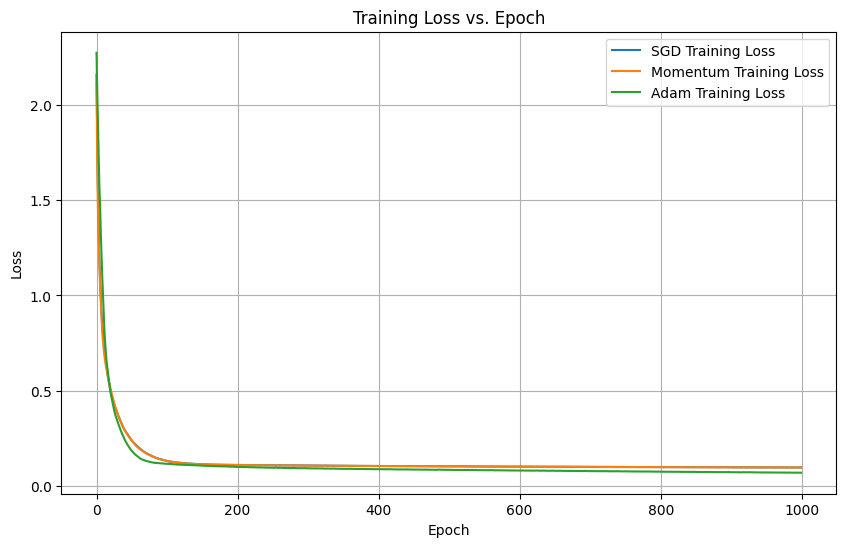

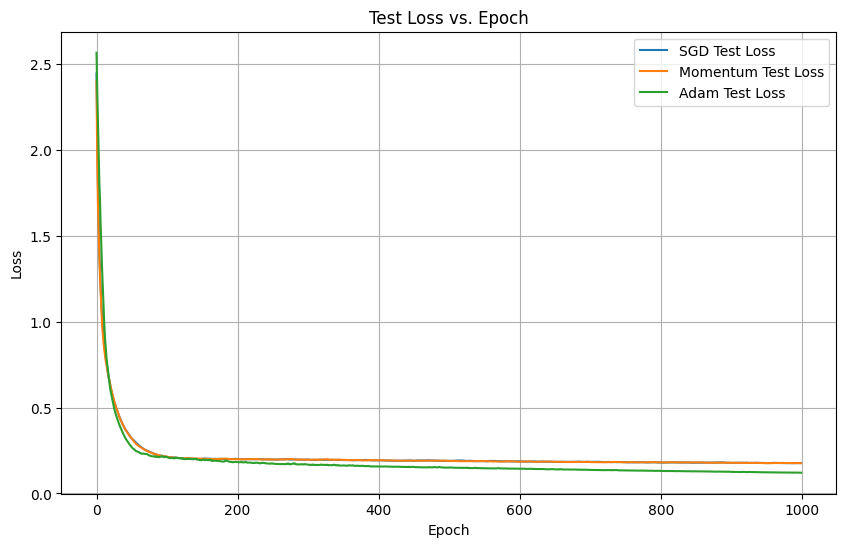

Final Test Loss Values:
SGD: 0.17713690172309549
Momentum: 0.17687183271298335
Adam: 0.12093600144525002


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data for polynomial regression
np.random.seed(1234)
def create_toy_data_poly(sample_size, std, domain=[0, 1], degree=5):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=std, size=x.shape)
    X = np.vander(x, degree + 1, increasing=True)  # Generate polynomial features
    return X, y

# Hyperparameters
epochs = 1000
learning_rate = 0.001
beta1 = 0.9  # for Momentum
beta2 = 0.999  # for Adam
epsilon = 1e-8  # for Adam

# Loss function (Mean Squared Error)
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return loss

# Gradient computation
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

# SGD algorithm
def sgd(X_train, y_train, X_test, y_test, theta, learning_rate, epochs):
    train_loss_history = []
    test_loss_history = []  # Track test loss
    m_train = len(y_train)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            theta -= learning_rate * gradient
        train_loss = compute_loss(X_train, y_train, theta)
        test_loss = compute_loss(X_test, y_test, theta)  # Calculate test loss
        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)  # Append test loss

    return train_loss_history, test_loss_history, theta

# Momentum optimizer
def momentum_optimizer(X_train, y_train, X_test, y_test, theta, learning_rate, epochs, beta1):
    train_loss_history = []
    test_loss_history = []  # Track test loss
    m_train = len(y_train)
    momentum = np.zeros_like(theta)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            momentum = beta1 * momentum + (1 - beta1) * gradient
            theta -= learning_rate * momentum
        train_loss = compute_loss(X_train, y_train, theta)
        test_loss = compute_loss(X_test, y_test, theta)  # Calculate test loss
        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)  # Append test loss

    return train_loss_history, test_loss_history, theta

# Adam optimizer
def adam_optimizer(X_train, y_train, X_test, y_test, theta, learning_rate, epochs, beta1, beta2, epsilon):
    train_loss_history = []
    test_loss_history = []  # Track test loss
    m_train = len(y_train)
    t = 0
    v = np.zeros_like(theta)
    s = np.zeros_like(theta)

    for epoch in range(epochs):
        for i in range(m_train):
            random_index = np.random.randint(m_train)
            X_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradient = compute_gradient(X_i, y_i, theta)
            t += 1
            v = beta1 * v + (1 - beta1) * gradient
            v_corrected = v / (1 - beta1**t)
            s = beta2 * s + (1 - beta2) * (gradient ** 2)
            s_corrected = s / (1 - beta2**t)
            theta -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)
        train_loss = compute_loss(X_train, y_train, theta)
        test_loss = compute_loss(X_test, y_test, theta)  # Calculate test loss
        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)  # Append test loss

    return train_loss_history, test_loss_history, theta

# Generate synthetic data for polynomial regression
X, y = create_toy_data_poly(100, 0.25, degree=5)  # Increase sample size and degree for better fit

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters (weights)
theta = np.random.randn(X_train.shape[1])

# Baseline SGD
sgd_train_loss, sgd_test_loss_history, sgd_theta = sgd(X_train, y_train, X_test, y_test, theta.copy(), learning_rate, epochs)

# Momentum optimizer
momentum_train_loss, momentum_test_loss_history, momentum_theta = momentum_optimizer(X_train, y_train, X_test, y_test, theta.copy(), learning_rate, epochs, beta1)

# Adam optimizer
adam_train_loss, adam_test_loss_history, adam_theta = adam_optimizer(X_train, y_train, X_test, y_test, theta.copy(), learning_rate, epochs, beta1, beta2, epsilon)

# Plotting Training Loss
plt.figure(figsize=(10, 6))
plt.plot(sgd_train_loss, label='SGD Training Loss')
plt.plot(momentum_train_loss, label='Momentum Training Loss')
plt.plot(adam_train_loss, label='Adam Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Test Loss
plt.figure(figsize=(10, 6))
plt.plot(sgd_test_loss_history, label='SGD Test Loss')
plt.plot(momentum_test_loss_history, label='Momentum Test Loss')
plt.plot(adam_test_loss_history, label='Adam Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Print final test loss values
print("Final Test Loss Values:")
print("SGD:", sgd_test_loss_history[-1])
print("Momentum:", momentum_test_loss_history[-1])
print("Adam:", adam_test_loss_history[-1])


#Interpretation from Loss Curves: Adam, Momemtum, Sgd

The loss curves for the SGD, Momentum, and Adam optimizers reveal distinct performance differences in polynomial regression tasks. Adam outperforms both SGD and Momentum, as evidenced by its rapid decline in both training and test loss, stabilizing at a significantly lower final test loss of 0.1209. This superior performance is due to Adam's adaptive learning rate mechanism and bias correction terms, which enable faster and more stable convergence. Momentum also shows improvement over vanilla SGD by incorporating a momentum term, resulting in a more rapid and consistent decline in loss, with a final test loss of 0.1769. In contrast, SGD has the slowest convergence and the highest final test loss of 0.1771, reflecting its susceptibility to noise in gradient estimates and simpler update rule.


Analyzing the test loss plot, we notice noise in all three curves, indicating fluctuations in the model's performance on unseen data during training. However, Adam consistently maintains the lowest test loss throughout, suggesting better generalization compared to SGD and Momentum. While Momentum exhibits slightly better performance than SGD.